In [1]:
# Import packages needed for the project

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import plotly.offline as pyoff
import plotly.graph_objs as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# matplotlib style & parameter changes
import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (16, 7)

#Importing complete wind and solar energy  data for 2015- 2021 Germany

In [2]:
df = pd.read_csv("time_series_60min_singleindex_filtered.csv", parse_dates=[0], index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25194 entries, 2014-12-31 23:00:00+00:00 to 2017-01-01 00:00:00
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cet_cest_timestamp                    25193 non-null  object 
 1   DE_load_actual_entsoe_transparency    25192 non-null  float64
 2   DE_load_forecast_entsoe_transparency  25192 non-null  float64
 3   DE_solar_capacity                     25193 non-null  float64
 4   DE_solar_generation_actual            25089 non-null  float64
 5   DE_solar_profile                      25089 non-null  float64
 6   DE_wind_capacity                      25193 non-null  float64
 7   DE_wind_generation_actual             25118 non-null  float64
 8   DE_wind_profile                       25118 non-null  float64
 9   DE_wind_offshore_capacity             25193 non-null  float64
 10  DE_wind_offshore_generation_actual    25118 non-n

In [4]:
#display rows which have null values in "wind generation actual"
df[df['DE_wind_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2016-05-31 21:00:00+00:00,2016-05-31T23:00:00+0200,49286.0,47884.0,38989.0,NaN,NaN,34217.0,NaN,NaN,2275.0,NaN,NaN,31942.0,NaN,NaN
2016-05-31 22:00:00+00:00,2016-06-01T00:00:00+0200,45570.0,44767.0,38991.0,NaN,NaN,34238.0,NaN,NaN,2275.0,NaN,NaN,31963.0,NaN,NaN
2016-05-31 23:00:00+00:00,2016-06-01T01:00:00+0200,43906.0,42865.0,38991.0,NaN,NaN,34238.0,NaN,NaN,2275.0,NaN,NaN,31963.0,NaN,NaN
2016-06-01 00:00:00+00:00,2016-06-01T02:00:00+0200,43059.0,41763.0,38991.0,NaN,NaN,34238.0,NaN,NaN,2275.0,NaN,NaN,31963.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-09 19:00:00+00:00,2016-12-09T20:00:00+0100,63626.0,65169.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN
2016-12-09 20:00:00+00:00,2016-12-09T21:00:00+0100,59988.0,61899.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN
2016-12-09 21:00:00+00:00,2016-12-09T22:00:00+0100,57554.0,59608.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN


In [5]:
df[df['DE_solar_generation_actual'].isna()]  #display rows which have null values in "solar generation actual"

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-09 19:00:00+00:00,2016-12-09T20:00:00+0100,63626.0,65169.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN
2016-12-09 20:00:00+00:00,2016-12-09T21:00:00+0100,59988.0,61899.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN
2016-12-09 21:00:00+00:00,2016-12-09T22:00:00+0100,57554.0,59608.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN


In [6]:
df.isna().sum()   #75 null values for wind_gen_actual #104 null values for solar_gen_actual 

cet_cest_timestamp                        1
DE_load_actual_entsoe_transparency        2
DE_load_forecast_entsoe_transparency      2
DE_solar_capacity                         1
DE_solar_generation_actual              105
DE_solar_profile                        105
DE_wind_capacity                          1
DE_wind_generation_actual                76
DE_wind_profile                          76
DE_wind_offshore_capacity                 1
DE_wind_offshore_generation_actual       76
DE_wind_offshore_profile                 76
DE_wind_onshore_capacity                  1
DE_wind_onshore_generation_actual        74
DE_wind_onshore_profile                  74
dtype: int64

####Filling null values from the values of the day before 

In [7]:
nulls = df.isna().any(axis=1)
df.loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']]

#shift function to shift the index 24 hours

####Rechecking the null values (whatever left)

In [8]:
df[df['DE_solar_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,NaN,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,NaN,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,NaN,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,NaN,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
2015-01-01 04:00:00+00:00,NaN,38941.0,38773.0,37248.0,NaN,NaN,27913.0,9231.0,0.3307,667.0,520.0,0.7790,27246.0,8712.0,0.3197
2015-01-01 05:00:00+00:00,NaN,39045.0,37247.0,37248.0,NaN,NaN,27913.0,9689.0,0.3471,667.0,521.0,0.7815,27246.0,9167.0,0.3365
2015-01-01 06:00:00+00:00,NaN,40206.0,40371.0,37248.0,NaN,NaN,27913.0,10331.0,0.3701,667.0,520.0,0.7801,27246.0,9811.0,0.3601


Observation --> The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before.

In [9]:
#fill in the rest to zero because that is what they would be at those hours of night till 6 am
df['DE_solar_generation_actual'].fillna(0, inplace = True)
df['cet_cest_timestamp'].fillna(0, inplace = True) 

####Repeating the same for wind energy

In [10]:
nulls =df.isna().any(axis=1)
df.loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']]



####Replacing the null values (whatever left) by mean



In [11]:
df[df['DE_wind_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,37248.0,0.0,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,NaN,41151.0,39723.0,37248.0,0.0,NaN,27913.0,NaN,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,NaN,40135.0,38813.0,37248.0,0.0,NaN,27913.0,NaN,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,NaN,39106.0,38490.0,37248.0,0.0,NaN,27913.0,NaN,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,NaN,38765.0,38644.0,37248.0,0.0,NaN,27913.0,NaN,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
2015-01-01 04:00:00+00:00,NaN,38941.0,38773.0,37248.0,0.0,NaN,27913.0,NaN,0.3307,667.0,520.0,0.7790,27246.0,8712.0,0.3197
2015-01-01 05:00:00+00:00,NaN,39045.0,37247.0,37248.0,0.0,NaN,27913.0,NaN,0.3471,667.0,521.0,0.7815,27246.0,9167.0,0.3365
2015-01-01 06:00:00+00:00,NaN,40206.0,40371.0,37248.0,0.0,NaN,27913.0,NaN,0.3701,667.0,520.0,0.7801,27246.0,9811.0,0.3601


In [12]:
df['DE_wind_generation_actual'].mean()

9349.071309457635

In [13]:
df['DE_wind_generation_actual'].fillna(11556, inplace=True)

In [14]:
df.isna().sum()

cet_cest_timestamp                        8
DE_load_actual_entsoe_transparency        2
DE_load_forecast_entsoe_transparency      2
DE_solar_capacity                         1
DE_solar_generation_actual                0
DE_solar_profile                        105
DE_wind_capacity                          1
DE_wind_generation_actual                 0
DE_wind_profile                          76
DE_wind_offshore_capacity                 1
DE_wind_offshore_generation_actual       76
DE_wind_offshore_profile                 76
DE_wind_onshore_capacity                  1
DE_wind_onshore_generation_actual        74
DE_wind_onshore_profile                  74
dtype: int64

#HEAT MAP TO CHECK CORRELATIONS BETWEEN FEATURES

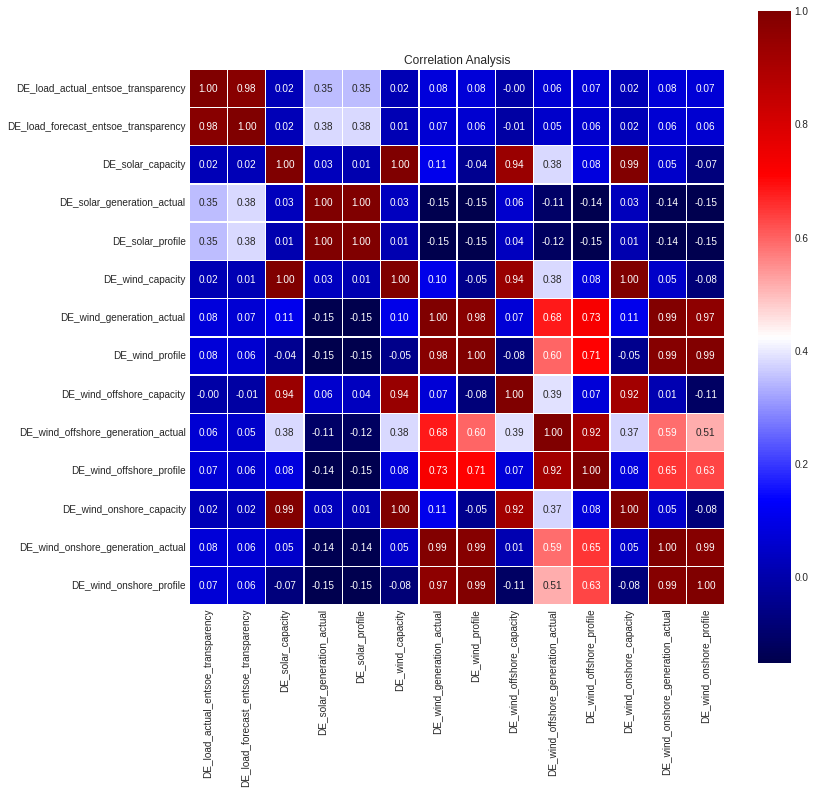

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=df.corr(),
            annot=True,
            annot_kws={"size": 10},
            square=True,
            cmap='seismic',
            fmt='.2f',
            linewidths=0.5,
            linecolor='w',
            ax=ax)
plt.title('Correlation Analysis')
plt.show()

solar_generation_actual depends most on solar_profile

wind_generation-actual depends most on wind_profile, wind_onshore_profile, wind_onshore_generation and  then on wind_offshore_profile and wind_offshore_generation 

#dataset with timestamps as features (used later for time series forecasting models)

In [16]:
modified=df[['cet_cest_timestamp', 'DE_solar_generation_actual','DE_wind_generation_actual']]
modified

,cet_cest_timestamp,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,,
2014-12-31 23:00:00+00:00,NaN,0.0,11556.0
2015-01-01 00:00:00+00:00,NaN,0.0,11556.0
2015-01-01 01:00:00+00:00,NaN,0.0,11556.0
2015-01-01 02:00:00+00:00,NaN,0.0,11556.0
2015-01-01 03:00:00+00:00,NaN,0.0,11556.0
...,...,...,...
2017-11-15 12:00:00+00:00,2017-11-15T13:00:00+0100,4659.0,2868.0
2017-11-15 13:00:00+00:00,2017-11-15T14:00:00+0100,3127.0,2381.0
2017-11-15 14:00:00+00:00,2017-11-15T15:00:00+0100,1189.0,1968.0


In [ ]:
#modified dataset
# energy_all = pd.read_csv("time_series_60min_singleindex_filtered (3).csv",
#                         parse_dates=[0], index_col=0)

The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before. We see that it that it also turned the dummy column, cet_cest_timestamp, into nulls at the same location. This is why I used it as dummy column.

In [ ]:
# Drop the column becasue we do not need another time column
modified.drop(columns='cet_cest_timestamp',inplace=True)

# EDA

##Histograms for solar_generation_actual and wind_generation_actual 

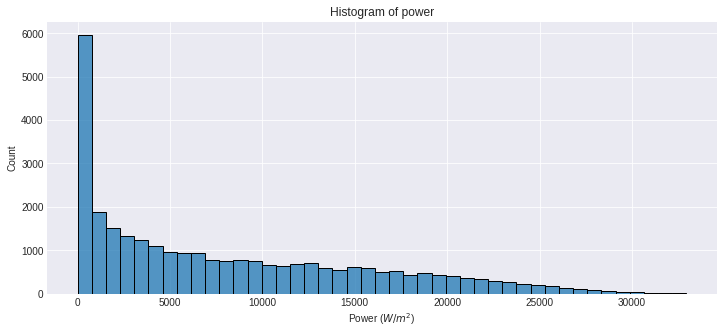

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['DE_solar_generation_actual'] != 0].DE_solar_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

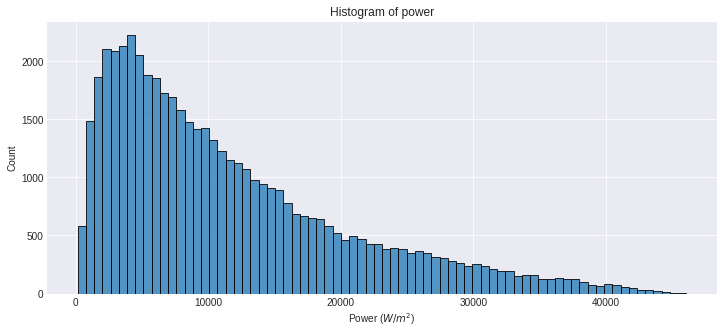

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['DE_wind_generation_actual'] != 0].DE_wind_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

In [ ]:
# We will create a new data frame so that we can make the appropriate boxplots. 
DE_energy = modified.reset_index()
DE_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   utc_timestamp               50401 non-null  datetime64[ns, UTC]
 1   DE_solar_generation_actual  50401 non-null  float64            
 2   DE_wind_generation_actual   50401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 1.2 MB


In [ ]:
# create utc_timestamp as a column and another hour column
DE_energy['utc_timestamp'] = pd.to_datetime(DE_energy['utc_timestamp']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))

DE_energy['utc_timestamp']=pd.to_datetime(DE_energy['utc_timestamp'])
DE_energy['hour'] = DE_energy['utc_timestamp'].dt.hour

## boxplot of energy output vs the hour at which recorded (useful for time series forecast)

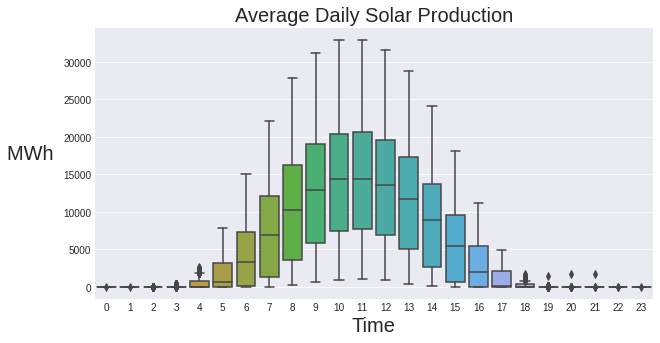

In [ ]:
# boxplot of the average solar generation production 
plt.figure(figsize=(10,5))
sns.boxplot(DE_energy['hour'], DE_energy['DE_solar_generation_actual'])

plt.title('Average Daily Solar Production',fontsize=20)

plt.xlabel('Time', fontsize=20)

plt.ylabel("MWh ",rotation='0',ha='right', fontsize=20)
plt.show()

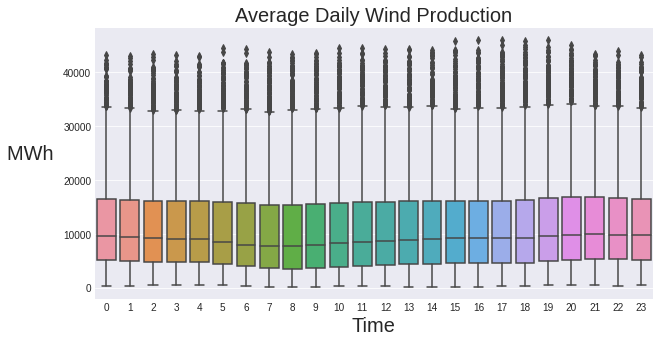

In [ ]:
# Lets repeat the process for wind.

plt.figure(figsize=(10,5))
sns.boxplot(DE_energy['hour'], DE_energy['DE_wind_generation_actual'])


plt.title('Average Daily Wind Production',fontsize=20)

plt.xlabel('Time', fontsize=20)

plt.ylabel("MWh ",rotation='0',ha='right', fontsize=20)
plt.show()

Wind appears to not differ as much during the day as solar.The time of day does affect wind speed with surface temperatures increasing, however it is not shown in this plot.

We can use mean over all the days to get a better time series analysis with less noise.

In [ ]:
# use the resample function to average the generation over all the days
modified = modified.resample('D').mean()
modified

,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,
2014-12-31 00:00:00+00:00,0.000000,11556.000000
2015-01-01 00:00:00+00:00,712.416667,14194.458333
2015-01-02 00:00:00+00:00,323.208333,25148.083333
2015-01-03 00:00:00+00:00,301.541667,19289.791667
2015-01-04 00:00:00+00:00,832.583333,16042.625000
...,...,...
2020-09-26 00:00:00+00:00,2713.125000,13015.041667
2020-09-27 00:00:00+00:00,1527.083333,16333.916667
2020-09-28 00:00:00+00:00,4035.666667,7771.750000


In [ ]:
modified.shape

(2101, 2)

#time series plot for energy averged over all days

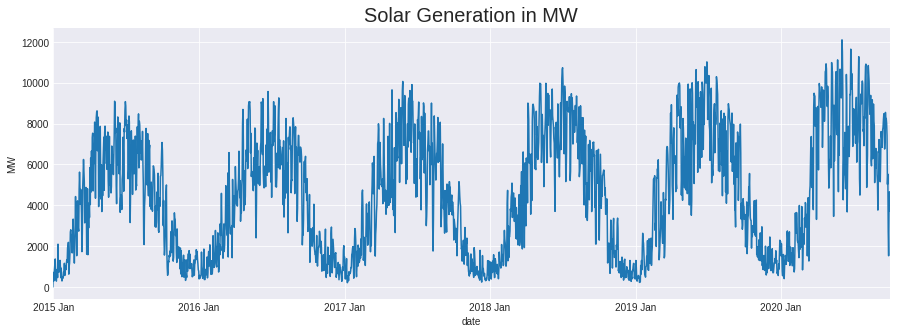

In [ ]:
# visualize the time time series of solar 
plt.figure(figsize=(15,5))
plt.plot(modified['DE_solar_generation_actual'])
plt.title('Solar Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

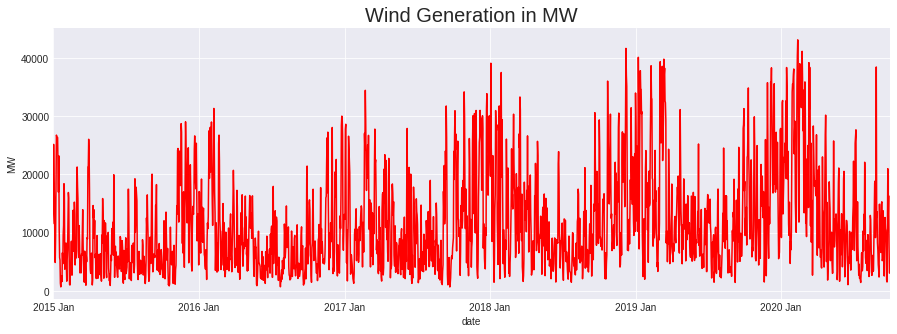

In [ ]:
# Do the same thing for the wind data
plt.figure(figsize=(15,5))
plt.plot(modified['DE_wind_generation_actual'], c='red')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [ ]:
# Lets check out some basic statistics for the data
modified.describe()

,DE_solar_generation_actual,DE_wind_generation_actual
count,2101.000000,2101.000000
mean,4557.518582,11556.499028
std,2903.978814,8410.922186
min,0.000000,686.750000
25%,1763.458333,5182.708333
50%,4484.958333,9116.208333
75%,6916.333333,15759.125000
max,12101.208333,43086.875000


The mean is much higher for wind and that is because wind produces much more electricity than solar in Germany. They both have very high standard deviations.

#MACHINE LEARNING ALOGORITHMS 

##Train-Test-Split

In [19]:
df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,37248.0,0.0,NaN,27913.0,11556.0,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,NaN,41151.0,39723.0,37248.0,0.0,NaN,27913.0,11556.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,NaN,40135.0,38813.0,37248.0,0.0,NaN,27913.0,11556.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,NaN,39106.0,38490.0,37248.0,0.0,NaN,27913.0,11556.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,NaN,38765.0,38644.0,37248.0,0.0,NaN,27913.0,11556.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172


In [20]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
df.fillna(0, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df['DE_solar_profile'], df['DE_solar_generation_actual'],test_size = 0.2, random_state = None)

In [23]:
X1_train=np.array(X1_train).reshape(-1,1)
X1_test=np.array(X1_test).reshape(-1,1)

In [24]:
X1_train

array([[0.435 ],
       [0.    ],
       [0.2836],
       ...,
       [0.    ],
       [0.392 ],
       [0.3319]])

In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df['DE_wind_profile'], df['DE_wind_generation_actual'],test_size = 0.2, random_state = None)

In [26]:
# For Wind Energy
X2_train=np.array(X2_train).reshape(-1,1)
X2_test=np.array(X2_test).reshape(-1,1)

In [27]:
X2_train

array([[0.4566],
       [0.4618],
       [0.2185],
       ...,
       [0.1464],
       [0.1296],
       [0.097 ]])

##Lasso Regression

In [17]:
df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,37248.0,0.0,NaN,27913.0,11556.0,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,NaN,41151.0,39723.0,37248.0,0.0,NaN,27913.0,11556.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,NaN,40135.0,38813.0,37248.0,0.0,NaN,27913.0,11556.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,NaN,39106.0,38490.0,37248.0,0.0,NaN,27913.0,11556.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,NaN,38765.0,38644.0,37248.0,0.0,NaN,27913.0,11556.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172


In [28]:
from sklearn.linear_model import Lasso
 
# Train the model
# Solar Energy
lasso = Lasso(alpha = 1)
lasso.fit(X1_train, y1_train)
y1_pred = lasso.predict(X1_test)

In [29]:
#Wind energy
lasso = Lasso(alpha = 1)
lasso.fit(X2_train, y2_train)
y2_pred = lasso.predict(X2_test)

In [30]:
#Hyperparameter tuning - alpha = 2
lasso = Lasso(alpha = 2)
lasso.fit(X1_train, y1_train)
y1_pred2 = lasso.predict(X1_test)

In [31]:
lasso = Lasso(alpha = 2)
lasso.fit(X2_train, y2_train)
y2_pred2 = lasso.predict(X2_test)

###Evaluation Metrics

####Mean Squared Error

In [32]:
#alpha = 1
from sklearn.metrics import mean_squared_error
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred))

Solar MSE =  187079.5679239025


In [33]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred))

Wind MSE =  2454975.7148110997


In [34]:
#alpha = 2
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred2))

Solar MSE =  187019.71983192605


In [35]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred2))

Wind MSE =  2454776.7924574628


####Mean Absolute Error

In [36]:
from sklearn.metrics import mean_absolute_error
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred))

Solar MAE =  132.93706149131816


In [37]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred))

Wind MAE =  984.4613970295608


In [38]:
#alpha = 2
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred2))

Solar MAE =  134.82435732978044


In [39]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred2))

Wind MAE =  984.9428638936305


####Root Mean Squared Error

In [40]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

Solar RMSE =  432.526956297411


In [41]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  1566.836211864884


In [42]:
#alpha = 2
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  432.4577665297804


In [43]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  1566.836211864884


####R Squared

In [44]:
from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.9951211325185776


In [45]:
r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.9536875214087429


In [46]:
#alpha = 2
r2_solar = r2_score(y1_test,y1_pred2)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.9951226933031839


In [47]:
r2_wind = r2_score(y2_test,y2_pred2)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.9536912740272264


###Plot

In [ ]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#RIDGE REGRESSION

In [48]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeSolar = Ridge(alpha = 1)
ridgeSolar.fit(X1_train, y1_train)
y1_pred = ridgeSolar.predict(X1_test)

In [49]:
ridgeWind = Ridge(alpha = 1)
ridgeWind.fit(X2_train, y2_train)
y2_pred = ridgeSolar.predict(X2_test)

In [50]:
#Hyperparameter tuning - alpha = 2
ridgeSolar = Ridge(alpha = 2)
ridgeSolar.fit(X1_train, y1_train)
y1_pred2 = ridgeSolar.predict(X1_test)

In [51]:
ridgeWind = Ridge(alpha = 2)
ridgeWind.fit(X2_train, y2_train)
y2_pred2 = ridgeSolar.predict(X2_test)

##Evaluation Metrics

###Mean Squared Error

In [52]:
from sklearn.metrics import mean_squared_error
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred))

Solar MSE =  187021.09592763998


In [53]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred))

Wind MSE =  5647289.2367159715


In [54]:
#alpha = 2
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred2))

Solar MSE =  187120.39219430464


In [55]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred2))

Wind MSE =  5574801.656948537


###Mean Absolute Error

In [56]:
from sklearn.metrics import mean_absolute_error
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred))

Solar MAE =  134.70789716873236


In [57]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred))

Wind MAE =  1479.174789760989


In [58]:
#alpha = 2
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred2))

Solar MAE =  138.6103377672086


In [59]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred2))

Wind MAE =  1470.198375564807


###Root Mean Squared Error

In [60]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

Solar RMSE =  432.45935754431304


In [61]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  2376.4025830477403


In [62]:
#alpha = 2
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  432.5741464700643


In [63]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

Wind RMSE =  2361.101788773313


###R Squared

In [64]:
from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.9951226574158408


In [65]:
r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.8934653567869735


In [66]:
#alpha = 2
r2_solar = r2_score(y1_test,y1_pred2)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.99512006785819


In [67]:
r2_wind = r2_score(y2_test,y2_pred2)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.8948328161332545


###Plot

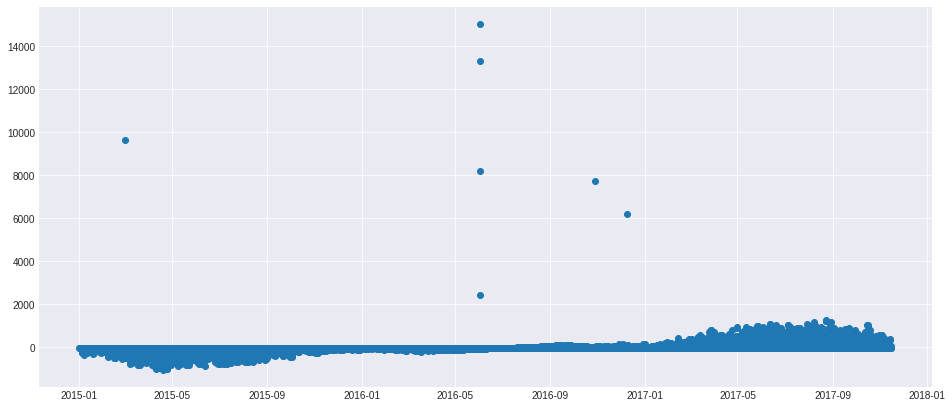

In [68]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#DECISION TREE

In [70]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [71]:
y1_pred = regressor.predict(X1_test)
  
# print the predicted price
y1_test


utc_timestamp
2015-06-09 13:00:00+00:00    9365.0
2015-02-14 16:00:00+00:00     237.0
2016-04-14 20:00:00+00:00       0.0
2015-07-19 18:00:00+00:00     642.0
2015-11-01 15:00:00+00:00    1130.0
                              ...  
2016-05-29 01:00:00+00:00       0.0
2015-12-26 21:00:00+00:00       0.0
2016-10-18 00:00:00+00:00       0.0
2016-06-30 00:00:00+00:00       0.0
2016-05-08 05:00:00+00:00    4973.0
Name: DE_solar_generation_actual, Length: 5039, dtype: float64

In [72]:
y1_pred

array([9650.33333333,  247.71428571,   26.20463847, ...,   26.20463847,
         26.20463847, 4973.        ])

In [ ]:
#from sklearn.model_selection import cross_val_score 
#cross_val_score(regressor, X1_train, y1_train, cv=50)

In [73]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [74]:
y2_pred = regressor.predict(X2_test)
  
# print the predicted price
y2_test

utc_timestamp
2016-08-05 11:00:00+00:00     6078.0
2017-09-28 06:00:00+00:00     6334.0
2017-03-17 00:00:00+00:00    19977.0
2017-06-06 04:00:00+00:00    13183.0
2016-04-08 23:00:00+00:00     1533.0
                              ...   
2016-02-02 15:00:00+00:00    27415.0
2017-02-23 07:00:00+00:00    19605.0
2016-06-21 07:00:00+00:00     4408.0
2017-02-26 22:00:00+00:00    19394.0
2015-09-19 04:00:00+00:00     3645.0
Name: DE_wind_generation_actual, Length: 5039, dtype: float64

In [ ]:
y2_pred

In [ ]:
#from sklearn.model_selection import cross_val_score 
#cross_val_score(regressor, X2_train, y2_train, cv=50)

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y1_pred, y1_test)

0.9938660837480479

In [77]:
r2_score(y2_pred, y2_test)

0.9340594840272888

In [78]:
from sklearn.metrics import mean_absolute_error as mae

In [79]:
error = mae(y1_test, y1_pred)
print(error)

163.6352805416791


In [80]:
error = mae(y2_test, y2_pred)
print(error)

1130.242378288231


In [81]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(y1_test, y1_pred)
print(MSE)

235449.43224789703


In [82]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(y2_test, y2_pred)
print(MSE)

3489822.796143505


In [83]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred)))

RMSE 485.2313182883984


In [84]:
#root mean squared error for wind
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred)))

RMSE 1868.106741100065


Hyperparameter tuning with random state=1

In [85]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 1) 
  
# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=1)

In [86]:
y1_pred2 = regressor.predict(X1_test)

In [87]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=1)

In [88]:
y2_pred2 = regressor.predict(X2_test)

In [89]:
r2_score(y1_pred2, y1_test)

0.9938660837480479

In [90]:
r2_score(y2_pred2, y2_test)

0.9340594840272888

In [91]:
MSE = mean_squared_error(y1_test, y1_pred2)
print(MSE)

235449.43224789703


In [92]:
MSE = mean_squared_error(y2_test, y2_pred2)
print(MSE)

3489822.796143505


In [93]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

RMSE 485.2313182883984


In [94]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

RMSE 1868.106741100065


In [95]:
error = mae(y1_test, y1_pred2)
print(error)

163.6352805416791


In [96]:
error = mae(y2_test, y2_pred2)
print(error)

1130.242378288231


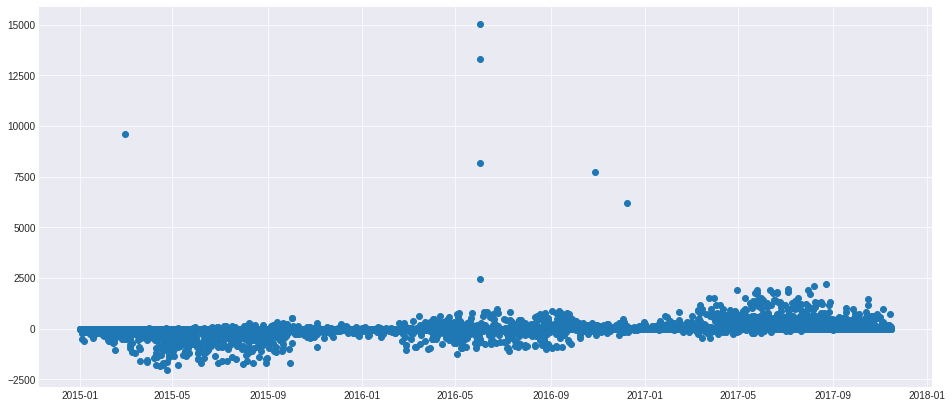

In [97]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#SVM 


hyper parameters in SVR- decison boundary, kernel and hyperplane

The basic idea behind SVR is to find the best fit line.The best fit line is the hyperplane that has the maximum number of points.

Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value. 

The threshold value is the distance between the hyperplane and boundary line. The fit time complexity of SVR is more than quadratic and hence hard to scale to datasets with more than a couple of 10000 samples.


For large datasets, Linear SVR or SGD Regressor is used

##solar energy

In [ ]:
df

,utc_timestamp,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
0,2015-01-01 07:00:00+00:00,2015-01-01T08:00:00+0100,41133.0,42522.0,37248.0,71.0,0.0019,27913.0,10208.0,0.3657,667.0,525.0,0.7874,27246.0,9683.0,0.3554
1,2015-01-01 08:00:00+00:00,2015-01-01T09:00:00+0100,42963.0,45020.0,37248.0,773.0,0.0207,27913.0,10029.0,0.3593,667.0,527.0,0.7907,27246.0,9502.0,0.3487
2,2015-01-01 09:00:00+00:00,2015-01-01T10:00:00+0100,45088.0,47101.0,37248.0,2117.0,0.0568,27913.0,10550.0,0.3780,667.0,525.0,0.7872,27246.0,10025.0,0.3679
3,2015-01-01 10:00:00+00:00,2015-01-01T11:00:00+0100,47013.0,49603.0,37248.0,3364.0,0.0903,27913.0,11390.0,0.4080,667.0,528.0,0.7908,27246.0,10862.0,0.3987
4,2015-01-01 11:00:00+00:00,2015-01-01T12:00:00+0100,48159.0,49910.0,37248.0,4198.0,0.1127,27913.0,12103.0,0.4336,667.0,528.0,0.7912,27246.0,11575.0,0.4248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25082,2017-11-15 11:00:00+00:00,2017-11-15T12:00:00+0100,68808.0,70144.0,41520.0,5224.0,0.1258,41733.0,3526.0,0.0845,3320.0,443.0,0.1334,38413.0,3083.0,0.0803
25083,2017-11-15 12:00:00+00:00,2017-11-15T13:00:00+0100,68266.0,69545.0,41520.0,4659.0,0.1122,41733.0,2868.0,0.0687,3320.0,289.0,0.0871,38413.0,2578.0,0.0671
25084,2017-11-15 13:00:00+00:00,2017-11-15T14:00:00+0100,67716.0,68526.0,41520.0,3127.0,0.0753,41733.0,2381.0,0.0570,3320.0,150.0,0.0453,38413.0,2230.0,0.0580
25085,2017-11-15 14:00:00+00:00,2017-11-15T15:00:00+0100,67465.0,67788.0,41520.0,1189.0,0.0286,41733.0,1968.0,0.0472,3320.0,104.0,0.0314,38413.0,1864.0,0.0485


In [ ]:
df = df.dropna()
df_solar_x=df[['DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
df_solar_y=df['DE_solar_generation_actual']
# df_solar_x.fillna(0)
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
df = df.reset_index()



In [ ]:
df = df.dropna()
df_solar_x=df[['utc_timestamp','DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
df_solar_y=df['DE_solar_generation_actual']
# df_solar_x.fillna(0)
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
df = df.reset_index()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# sc_y = StandardScaler()
# x = sc_x.fit_transform(df_solar_x)
# # y=df_solar_y.reshape(2, 1)
# # y = sc_y.fit_transform(y)

In [ ]:
# df_solar_x = df_solar_x.dropna()
df_solar_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25087 entries, 0 to 25086
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DE_load_actual_entsoe_transparency    25087 non-null  float64
 1   DE_load_forecast_entsoe_transparency  25087 non-null  float64
 2   DE_solar_profile                      25087 non-null  float64
dtypes: float64(3)
memory usage: 784.0 KB


In [ ]:
from sklearn.model_selection import train_test_split
solar_x_train, solar_x_test,solar_y_train,solar_y_test = train_test_split(df_solar_x,df_solar_y,test_size = 0.2, random_state = None)
solar_x_train
#solar_y_train = solar_y_train.reshape(-1,1)
#solar_y_test = solar_y_test.reshape(-1,1)

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_profile
19085,63909.0,64449.0,0.2695
7280,46314.0,47355.0,0.0294
23390,43524.0,42980.0,0.0000
10550,58725.0,57125.0,0.0000
22547,52896.0,50985.0,0.0000
...,...,...,...
19933,40243.0,39247.0,0.0000
20464,37121.0,36455.0,0.0000
1097,44112.0,45708.0,0.0000
25006,45844.0,47970.0,0.0188


In [ ]:
from sklearn.svm import SVR
#regressor = SVR(kernel = 'rbf')
regressor = SVR(kernel='rbf', C=1e3, gamma = 0.5, epsilon = 0.01)
regressor.fit(solar_x_train,solar_y_train)
solar_y_pred = regressor.predict(solar_x_test)


In [ ]:
solar_y_pred

array([824.42568203, 824.42568203, 824.42568203, ..., 824.42568203,
       824.42568203, 824.42568203])

In [ ]:
solar_y_test

17710       84.0
24746     6864.0
14406    21389.0
7421      5032.0
21422        0.0
          ...   
10492    19925.0
19832      691.0
23798        0.0
567          0.0
8196         0.0
Name: DE_solar_generation_actual, Length: 5018, dtype: float64

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, solar_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, solar_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, solar_y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, solar_y_pred))

Mean Absolute Error: 4083.092941373481
Mean Squared Error: 48031535.9341048
Root Mean Squared Error: 6930.47876658639
R square score: -0.27615833193094064


HP TUNING

 The literature recommends an epsilon between 1-e3 and 1. Concerning the C parameter a good hyperparameter space would be between 1 and 100. A C that is too large will simply overfit the training data.

The gamma is already calculated by scikit-learn SVR. I would not change it.

Don't forget that you can also tune the kernel and this might be the most important hyperparameter to tune.

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='sigmoid', C=1e3, gamma = 0.5, epsilon = 0.01)
regressor.fit(solar_x_train,solar_y_train)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='poly', C=1e3, gamma = 0.5, epsilon = 0.01)
regressor.fit(solar_x_train,solar_y_train)

In [ ]:
solar_y_pred = regressor.predict(solar_x_test)
solar_y_pred

#y_pred = y.inverse_transform(y_pred)

In [ ]:
param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1,0.5, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
               'epsilon':[0.1,0.01,0.001]} 
              
from sklearn.model_selection import GridSearchCV

#param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

modelsvr = SVR()

grids = GridSearchCV(modelsvr,param)

grids.fit(solar_x_train,solar_y_train)

In [ ]:

# print best parameter after tuning
print(grids.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grids.best_estimator_)

In [ ]:
from sklearn.metrics import r2_score
r2_score(solar_y_pred,solar_y_test)

In [ ]:
# plt.figure(1)
# plt.plot(solar_y_test, solar_y_pred, c = 'navy', label = 'Predicted')
# plt.legend()
# plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(solar_y_pred,solar_y_test)

using linear SVR (ideal for large datasets)

In [ ]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(verbose=0, dual=True)

# LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
#           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
#           random_state=None, tol=0.0001, verbose=0)

#Then, we'll fit the model on train data and check the model accuracy score.

lsvr.fit(solar_x_train, solar_y_train)
y_pred = lsvr.predict(solar_x_test)
y_pred


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
scorer = make_scorer(mean_squared_error, greater_is_better=False)
svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)

##wind energy 

In [ ]:
df.dropna()
df_wind_x=df[['DE_wind_capacity','DE_wind_profile','DE_wind_offshore_generation_actual','DE_wind_offshore_profile','DE_wind_onshore_generation_actual','DE_wind_onshore_profile']]
df_wind_y=df['DE_wind_generation_actual']

In [ ]:
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x,df_wind_y,test_size = 0.2, random_state = None)

In [ ]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(verbose=0, dual=True)
# LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
#           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
#           random_state=None, tol=0.0001, verbose=0)

#Then, we'll fit the model on train data and check the model accuracy score.

lsvr.fit(wind_x_train,wind_y_train)
y_pred = lsvr.predict(wind_x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,wind_y_test)

0.99999997674954

In [ ]:
from sklearn.metrics import mean_squared_error
ypred = lsvr.predict(wind_x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(wind_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(wind_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(wind_y_test, y_pred)))
print('R square score:', metrics.r2_score(wind_y_test, y_pred))

Mean Absolute Error: 1.0286656268252363
Mean Squared Error: 1.3082922829816441
Root Mean Squared Error: 1.1438060512961294
R square score: 0.999999976749688


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(wind_x_train,wind_y_train)

#RANDOM FOREST

parameters in Random forest- n_estimators and random state

##solar energy

In [ ]:
df.dropna()
df_solar_x=df[['DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
df_solar_y=df['DE_solar_generation_actual']
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
# df_solar_y.fillna(0,inplace=True)
df_solar_x.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DE_load_actual_entsoe_transparency    50401 non-null  float64
 1   DE_load_forecast_entsoe_transparency  50401 non-null  float64
 2   DE_solar_profile                      50401 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [ ]:
df_solar_x.isna().sum()

DE_load_actual_entsoe_transparency      0
DE_load_forecast_entsoe_transparency    0
DE_solar_profile                        0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
solar_x_train, solar_x_test,solar_y_train,solar_y_test = train_test_split(df_solar_x,df_solar_y,test_size = 0.2, random_state = None)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = solar_x_train

target = solar_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(solar_x_train,solar_y_train)

RandomForestRegressor()

feature importance

Feature: 0, Score: 0.13608
Feature: 1, Score: 0.14301
Feature: 2, Score: 0.72091


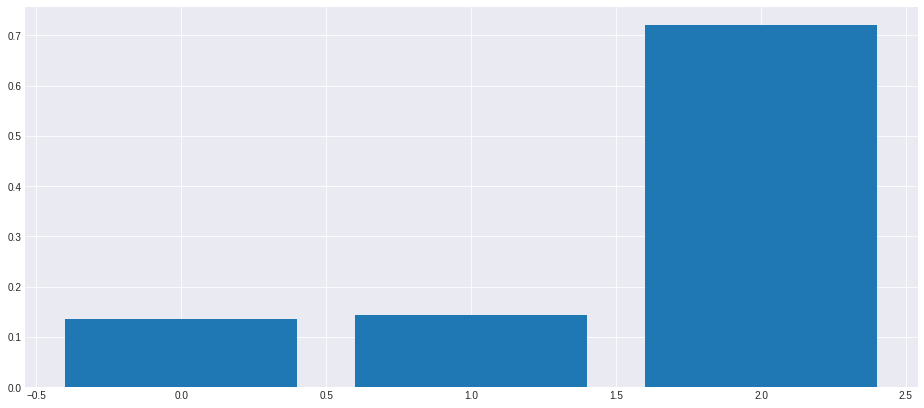

In [ ]:
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

most important feature for random forest is solar_profile

In [ ]:
y_pred = rfr.predict(solar_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 1601.6730294613628
Mean Squared Error: 14778881.7861369
Root Mean Squared Error: 3844.3311233733366
R square score: 0.6985548805367616


##wind energy

In [ ]:

df_wind_x=df[['DE_wind_capacity','DE_wind_profile','DE_wind_offshore_generation_actual','DE_wind_offshore_profile','DE_wind_onshore_generation_actual','DE_wind_onshore_profile']]
df_wind_y=df['DE_wind_generation_actual']

In [ ]:
#df_wind_x.info()   #no null values
#df_wind_y.isna()

In [ ]:
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x,df_wind_y,test_size = 0.2, random_state = None)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = wind_x_train

target = wind_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(wind_x_train,wind_y_train)

RandomForestRegressor()

feature importance

Feature: 0, Score: 0.00989
Feature: 1, Score: 0.01126
Feature: 2, Score: 0.07010
Feature: 3, Score: 0.00321
Feature: 4, Score: 0.90249
Feature: 5, Score: 0.00306


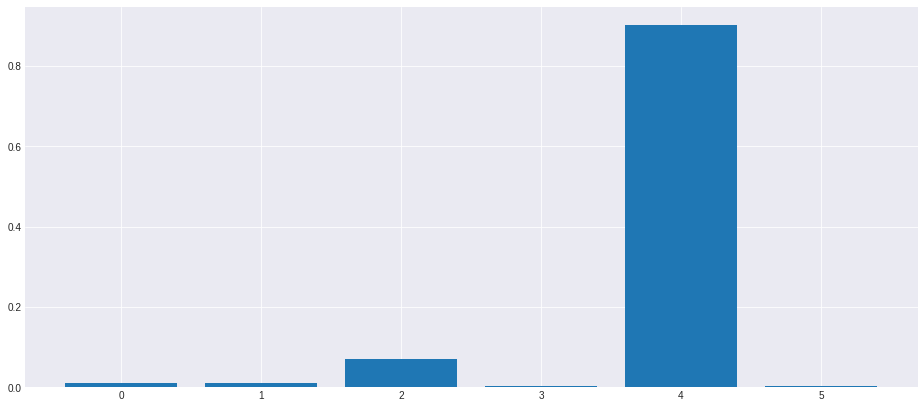

In [ ]:
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

wind onshore generation actual and wind_profile are the most important features

In [ ]:
y_pred = rfr.predict(wind_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 10225.997140050993
Mean Squared Error: 172940190.13865203
Root Mean Squared Error: 13150.672611644319
R square score: -2.5274641905074784


poor r sqaure score--> making use of feature importance to remove unimportant features

In [ ]:
df_wind_x2=df[['DE_wind_profile']]
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x2,df_wind_y,test_size = 0.2, random_state = None)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = wind_x_train

target = wind_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(wind_x_train,wind_y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(wind_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 10087.830126289899
Mean Squared Error: 158252281.02810317
Root Mean Squared Error: 12579.836287810074
R square score: -2.227874642355884


to improve score--> Hyper parameter tuning 

In [ ]:
#wind energy
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
regressor.fit(X2_train, y2_train)
y2_pred = regressor.predict(X2_test)  

r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)


print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))

Wind R2 =  0.7294722360678287
Mean Absolute Error: 10087.830126289899
Mean Squared Error: 158252281.02810317
Root Mean Squared Error: 12579.836287810074


#ARIMA MODEL

##For solar energy

In [ ]:
# Create a series for the solar generation
solar_power = modified['DE_solar_generation_actual']

In [ ]:
solar_power

utc_timestamp
2014-12-31 00:00:00+00:00       0.000000
2015-01-01 00:00:00+00:00     712.416667
2015-01-02 00:00:00+00:00     323.208333
2015-01-03 00:00:00+00:00     301.541667
2015-01-04 00:00:00+00:00     832.583333
                                ...     
2020-09-26 00:00:00+00:00    2713.125000
2020-09-27 00:00:00+00:00    1527.083333
2020-09-28 00:00:00+00:00    4035.666667
2020-09-29 00:00:00+00:00    4656.791667
2020-09-30 00:00:00+00:00    3706.958333
Freq: D, Name: DE_solar_generation_actual, Length: 2101, dtype: float64

In [ ]:
solar_power.describe()

count     2101.000000
mean      4557.518582
std       2903.978814
min          0.000000
25%       1763.458333
50%       4484.958333
75%       6916.333333
max      12101.208333
Name: DE_solar_generation_actual, dtype: float64

In [ ]:
# Check the decomposition of the solar power data
from statsmodels.api import tsa
decomposition = tsa.seasonal_decompose(solar_power, period=365, model='additive')

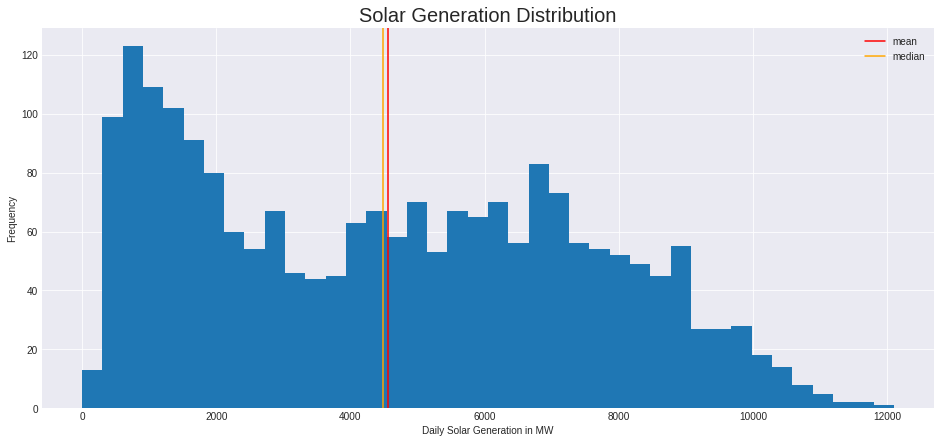

In [ ]:
# Plot distribution
plt.figure()
plt.hist(solar_power, bins=40)
plt.title('Solar Generation Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Daily Solar Generation in MW')
plt.axvline(solar_power.mean(), c='red', label ='mean')
plt.axvline(solar_power.median(), c='orange', label ='median')
plt.legend()

plt.show()

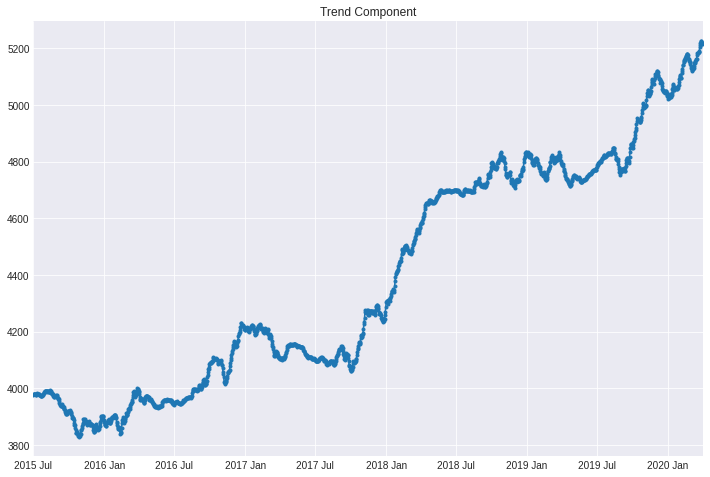

In [ ]:
import matplotlib.dates as mdates
# Trend
plt.figure(figsize=(12,8))
plt.plot(decomposition.trend, marker='.')
plt.title('Trend Component')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show();


#stationery check

In [ ]:
s = adfuller(solar_power, regression='ct')
print('p-value:{}'.format(s[1]))

p-value:0.13334411232750187


In [ ]:
# Lets check the differencce 
s = adfuller(solar_power.diff().dropna(), regression='c')
print('p-value:{}'.format(s[1]))

p-value:1.4922826479286081e-27


Series with difference is stationary because fo the p-value less than 0.05

#Finding the order of differencing for the ARIMA model

In [ ]:
# check the time series
solar_power

utc_timestamp
2014-12-31 00:00:00+00:00       0.000000
2015-01-01 00:00:00+00:00     712.416667
2015-01-02 00:00:00+00:00     323.208333
2015-01-03 00:00:00+00:00     301.541667
2015-01-04 00:00:00+00:00     832.583333
                                ...     
2020-09-26 00:00:00+00:00    2713.125000
2020-09-27 00:00:00+00:00    1527.083333
2020-09-28 00:00:00+00:00    4035.666667
2020-09-29 00:00:00+00:00    4656.791667
2020-09-30 00:00:00+00:00    3706.958333
Freq: D, Name: DE_solar_generation_actual, Length: 2101, dtype: float64

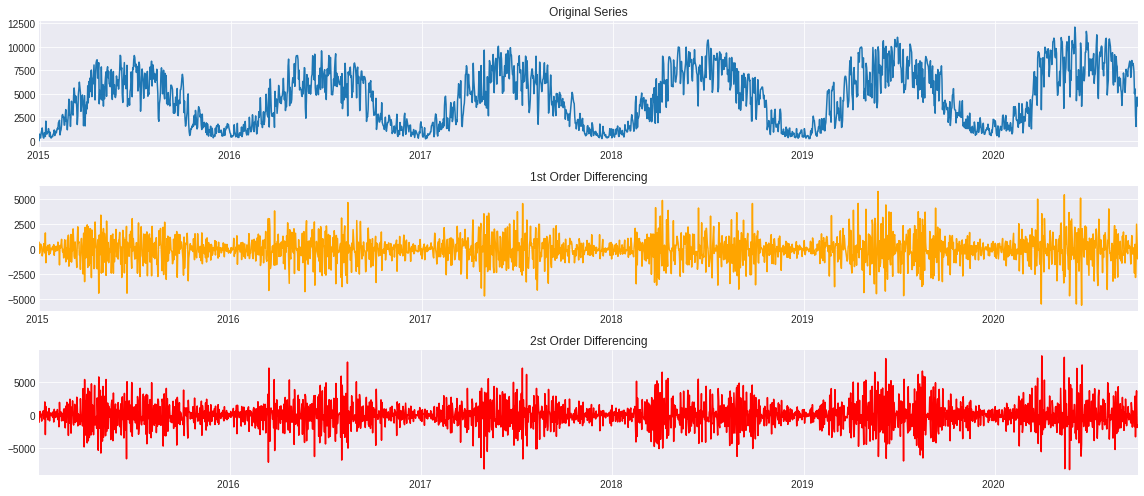

In [ ]:
# Lets take a look at the timeseries compared to when we take the 1st and 2nd difference 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.subplots(3, 1)  

# orginal series
plt.subplot(3,1,1)
plt.plot(solar_power)
plt.title('Original Series')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.subplot(3,1,2)
plt.plot(solar_power.diff().dropna(), c='orange')
plt.title('1st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))


plt.subplot(3,1,3)
plt.plot(solar_power.diff().diff().dropna(), c='red')
plt.title('2st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.tight_layout()
plt.show()

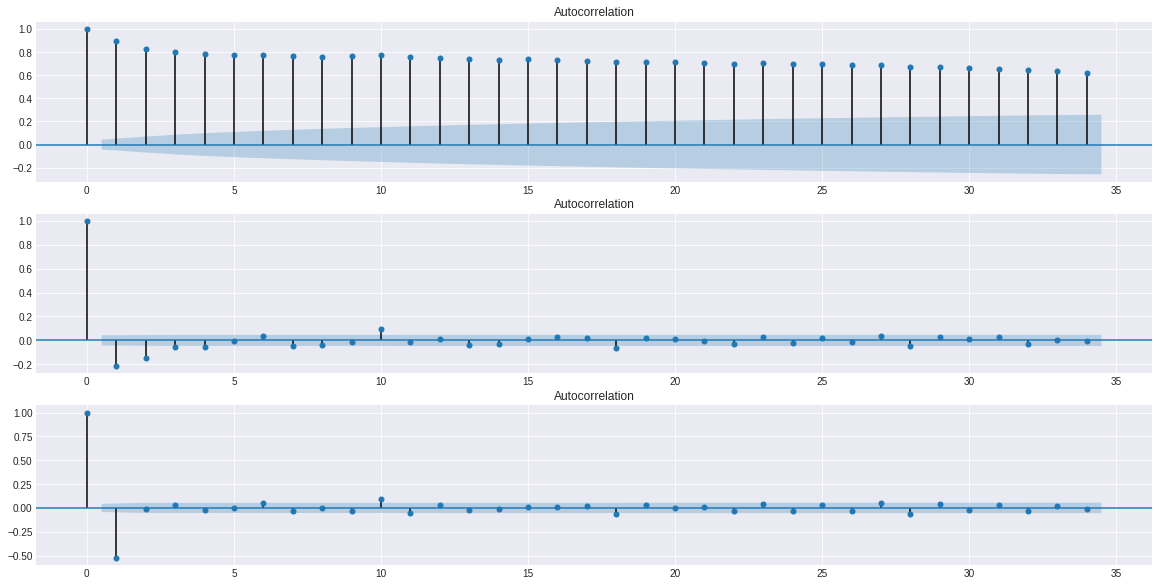

In [ ]:
# Visualize the autocorrelation plots so that we can get a better idea of differencing.
fig,ax = plt.subplots(3,1,figsize=(20,10))
fig = plot_acf(solar_power, ax=ax[0])
fig = plot_acf(solar_power.diff().dropna(), ax=ax[1])
fig = plot_acf(solar_power.diff().diff().dropna(), ax=ax[2])

From the above series it is clear that the time series reaches stationary after one differencing. The second differencing goes far negative a little too quick which suggests some over differencing. I am going to use d=1 in my ARIMA model. We can see that the series is much more stationary in the first difference graph as well.

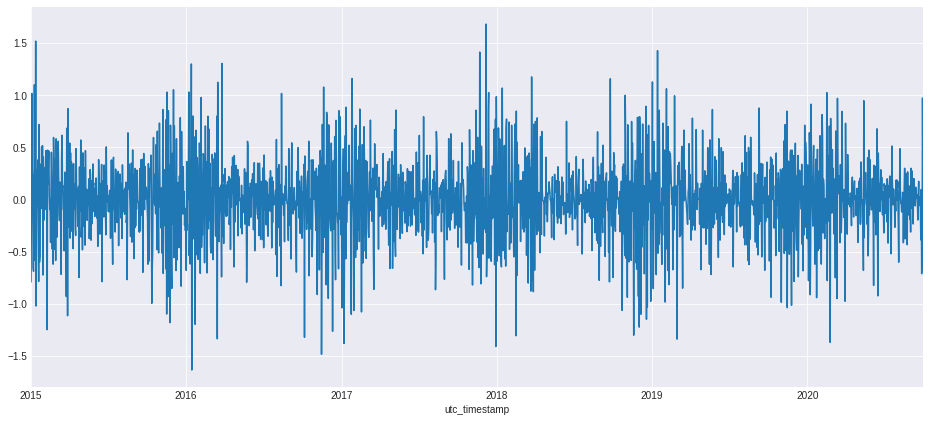

In [ ]:
# ANother option would be to do a log transformation to deal with trend being statoinary but not strict stationary.
np.log(solar_power).diff().dropna().plot()
plt.show()

In [ ]:
solar_log= np.log(solar_power).diff().dropna()

#Finding order of the ar term

For the ARIMA model we need to first find the the order (p,d,q). To find the first p order, it is good to look at the Partial auto correlation plot

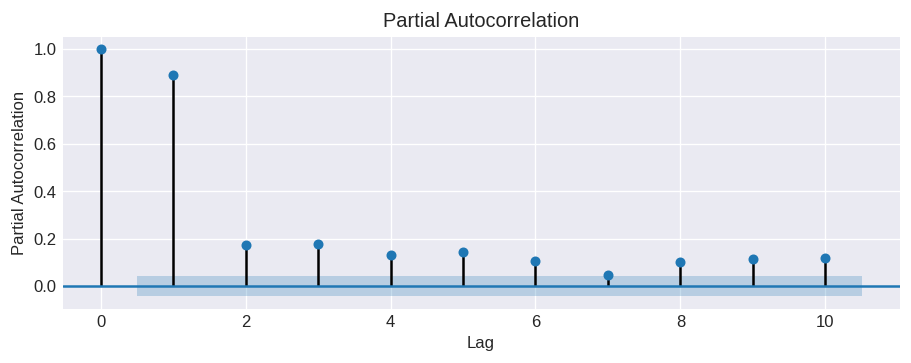

In [ ]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
                    
                    
plot_pacf(solar_power, lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

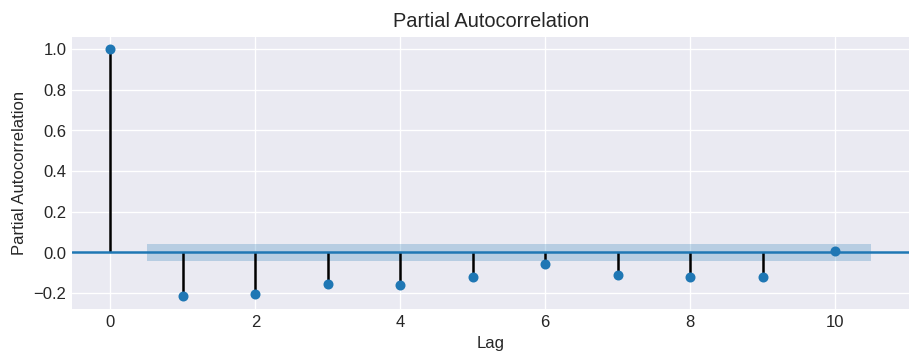

In [ ]:
# lets check the differened one as well
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
                    
                    
plot_pacf(solar_power.diff().dropna(), lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

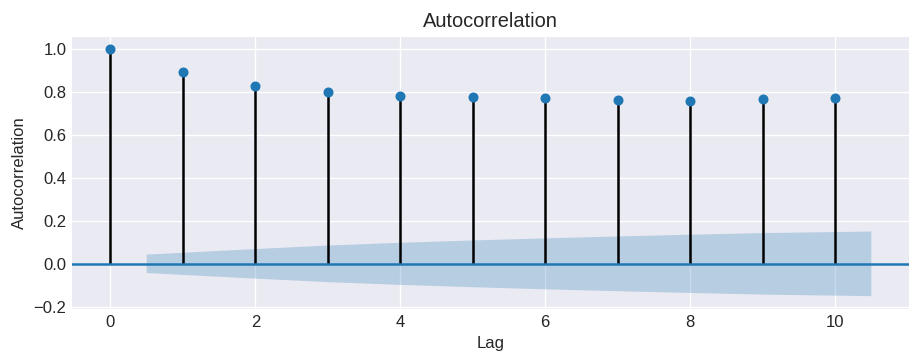

In [ ]:
# to find the q value, it is helpful to look at the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(solar_power, lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

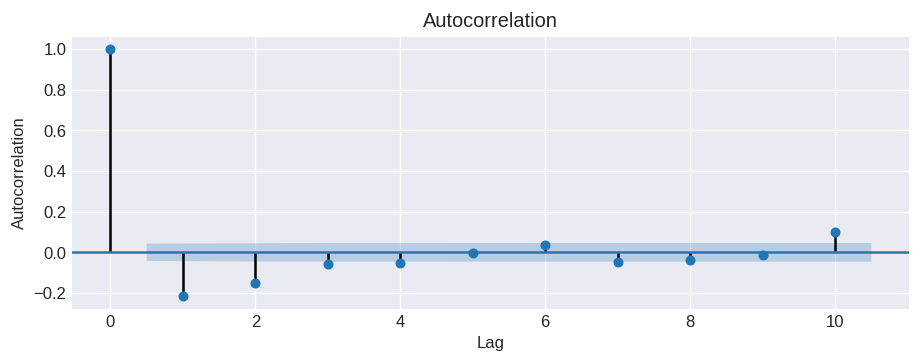

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(solar_power.diff().dropna(), lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

It looks likes 3 is the best answer for q=3.

#Train and test split

In [ ]:
test_percent = .15
test_number = int(solar_power.shape[0]*test_percent)
train_s = solar_power[:-test_number]
test_s = solar_power[-test_number:]

In [ ]:
train_s.shape

(1786,)

In [ ]:
test_s.shape

(315,)

In [ ]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s = SARIMAX(train_s, order=(6,1,6), 
                enforce_stationarity=False, 
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)

Coefficients: drift    -6.865810e-03
ar.L1    -7.743571e-01
ar.L2    -1.718044e-01
ar.L3    -7.408196e-01
ar.L4    -9.842073e-02
ar.L5     3.728950e-01
ar.L6    -6.208564e-02
ma.L1     3.794233e-01
ma.L2    -3.623207e-01
ma.L3     4.000891e-01
ma.L4    -3.737466e-01
ma.L5    -6.447966e-01
ma.L6     1.571696e-01
sigma2    1.431134e+06
dtype: float64


RMSE:  519.262696438411


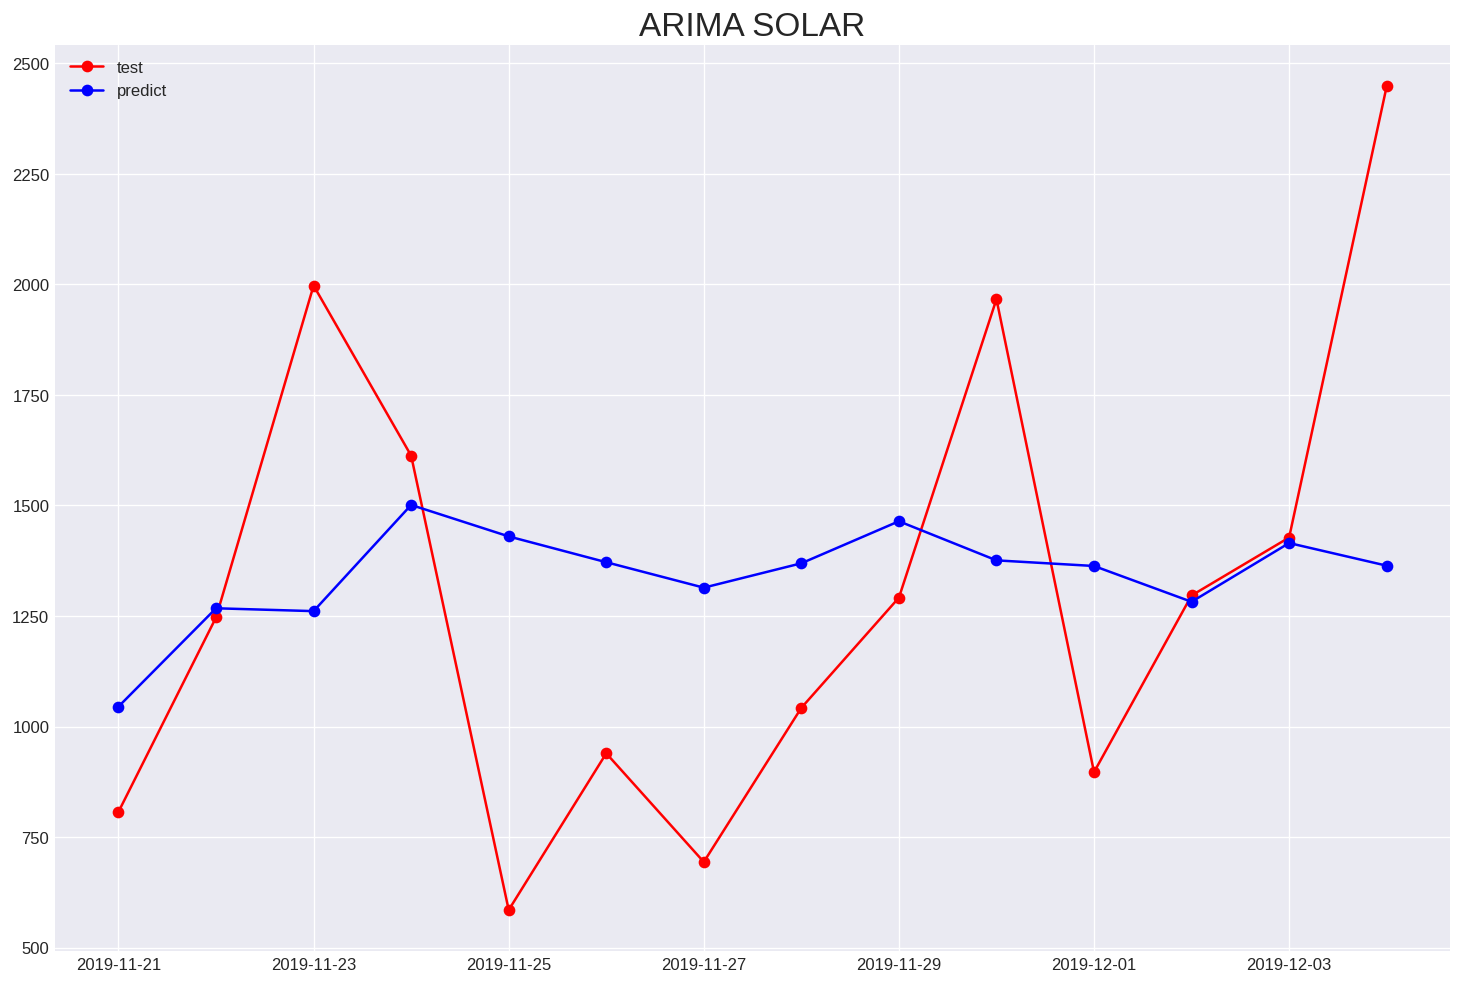

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = model_fit_s.predict(start=len(train_s), end=len(train_s)+len(test_s)-1, typ="levels", index= test_s.index)

print("RMSE: ", sqrt(mean_squared_error(test_s[:14], predictions[:14])))
plt.figure(figsize=(15,10))
plt.plot(test_s[:14], c="red", label="test", marker='o')
plt.plot(predictions[:14], c="blue", label="predict", marker='o')
plt.legend()
plt.title('ARIMA SOLAR', fontsize=(20))
plt.show();

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE: ", mean_absolute_error(test_s[:14], predictions[:14]))

MAE:  405.05560298057


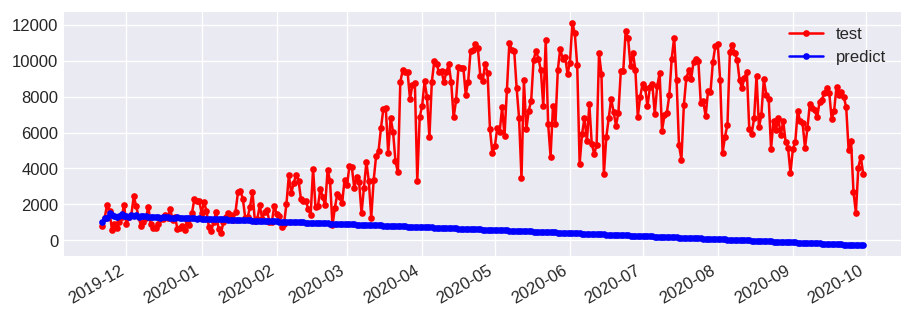

In [ ]:
# make prediction
predictions = model_fit_s.predict(start=len(train_s), end=len(train_s)+len(test_s)-1, typ="levels", index=test_s.index)

fig = plt.figure()
plt.plot(test_s, c="red", label="test", marker='.')
plt.plot(predictions, c="blue", label="predict", marker='.')
plt.legend()
fig.autofmt_xdate()
plt.show();

In [ ]:
# Run a loop throgh the model to find the best parameters 
best_MAE = float('inf')

for p in range(1,7):
    for d in range(0,2):
        for q in range(1,7):
            
            print(f"Trying values of {(p,d,q)}",end = "\r")
            
            model = SARIMAX(train_s,order = (p,d,q),
                           enforce_stationary = False,
                           enforce_invertibility = False,
                           trend = "t")
            
            model_fit = model.fit(maxiter = 2000)
            
            predictions = model_fit.predict(start=len(train_s),end = len(train_s) + len(test_s) - 1,typ="levels", index=test_s.index)
            
            current_MAE = mean_absolute_error(test_s[:10],predictions[:10])
            
            if (best_MAE > current_MAE):
                best_MAE = current_MAE
                print(f"Found new best MAE of {best_MAE} with values {(p,d,q)}")

Found new best MAE of 790.6111799798057 with values (1, 0, 1)
Found new best MAE of 489.36227894971125 with values (1, 0, 2)
Found new best MAE of 446.97646325220404 with values (1, 1, 1)
Found new best MAE of 439.3698496479812 with values (1, 1, 2)
Found new best MAE of 437.3157819000295 with values (1, 1, 3)
Found new best MAE of 437.2744877603139 with values (1, 1, 5)
Found new best MAE of 413.9474911983237 with values (1, 1, 6)
Found new best MAE of 379.5274419658466 with values (2, 1, 5)


KeyboardInterrupt: ignored

#For wind energy

In [ ]:
# create a wind_power series
wind_power = modified['DE_wind_generation_actual']

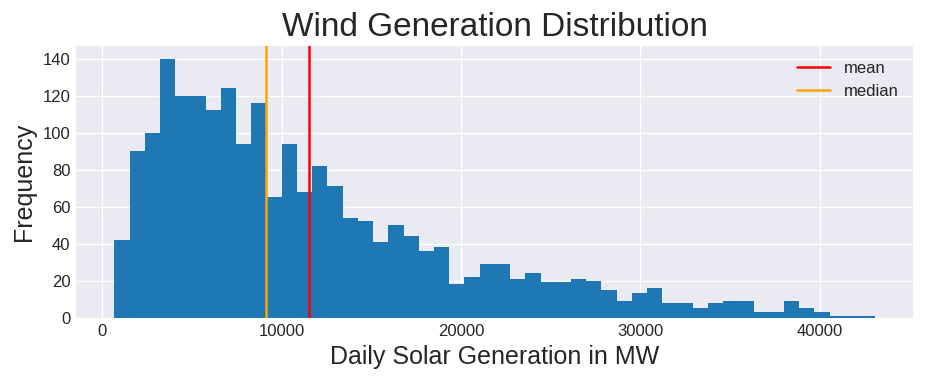

In [ ]:
plt.figure()
plt.hist(wind_power, bins=50)
plt.title('Wind Generation Distribution', fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Daily Solar Generation in MW',fontsize=15)
plt.axvline(wind_power.mean(), c='red', label ='mean')
plt.axvline(wind_power.median(), c='orange', label ='median')
plt.legend()

plt.show()

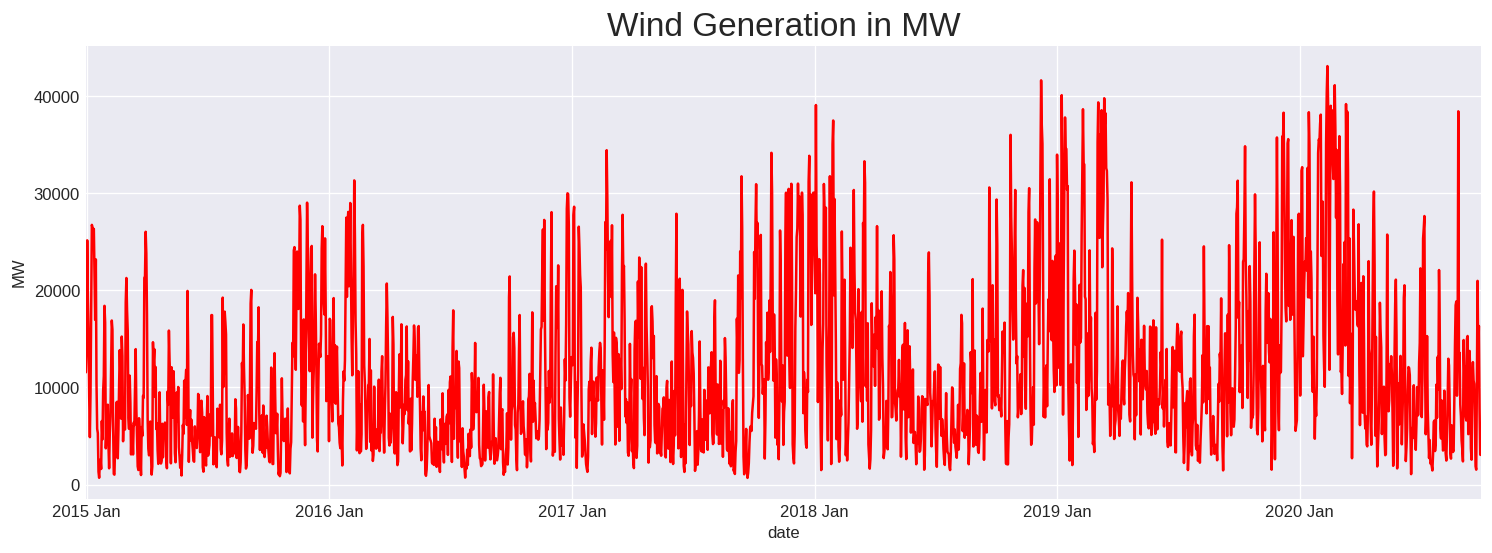

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(wind_power, c='red')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [ ]:
# Check the decomposition of the wind power data
from statsmodels.api import tsa
decomposition = tsa.seasonal_decompose(wind_power, period=365, model='additive')

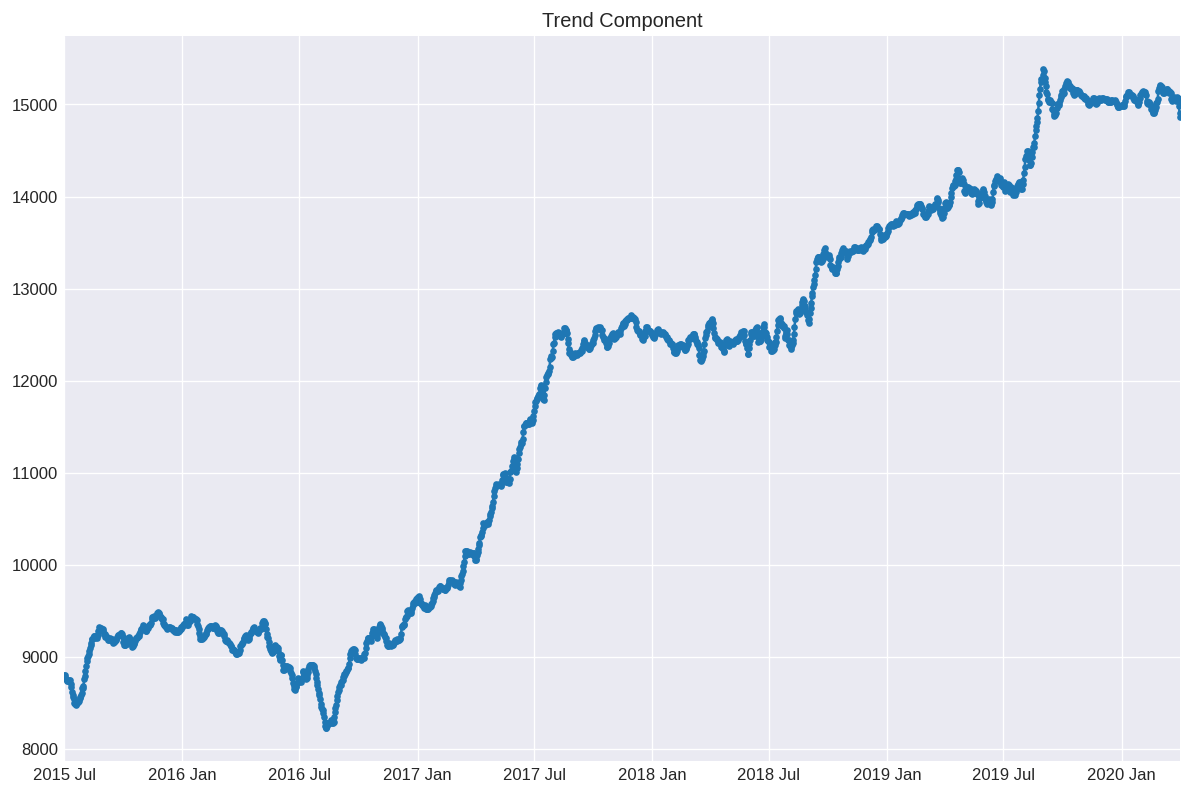

In [ ]:
import matplotlib.dates as mdates
# Trend
plt.figure(figsize=(12,8))
plt.plot(decomposition.trend, marker='.')
plt.title('Trend Component')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show();


#Stationery Check

In [ ]:
s = adfuller(wind_power, regression='ct')
print('p-value:{}'.format(s[1]))

p-value:0.0008646251107839552


In [ ]:
# Lets check the differencce 
s = adfuller(wind_power.diff().dropna(), regression='c')
print('p-value:{}'.format(s[1]))

p-value:3.92272568608771e-29


The series is stationery

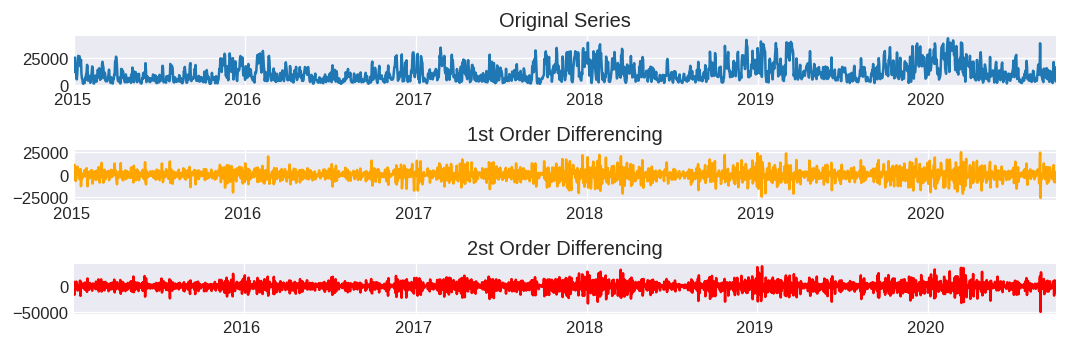

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.subplots(3, 1)  

# orginal series
plt.subplot(3,1,1)
plt.plot(wind_power)
plt.title('Original Series')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.subplot(3,1,2)
plt.plot(wind_power.diff().dropna(), c='orange')
plt.title('1st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))


plt.subplot(3,1,3)
plt.plot(wind_power.diff().diff().dropna(), c='red')
plt.title('2st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.tight_layout()
plt.show()


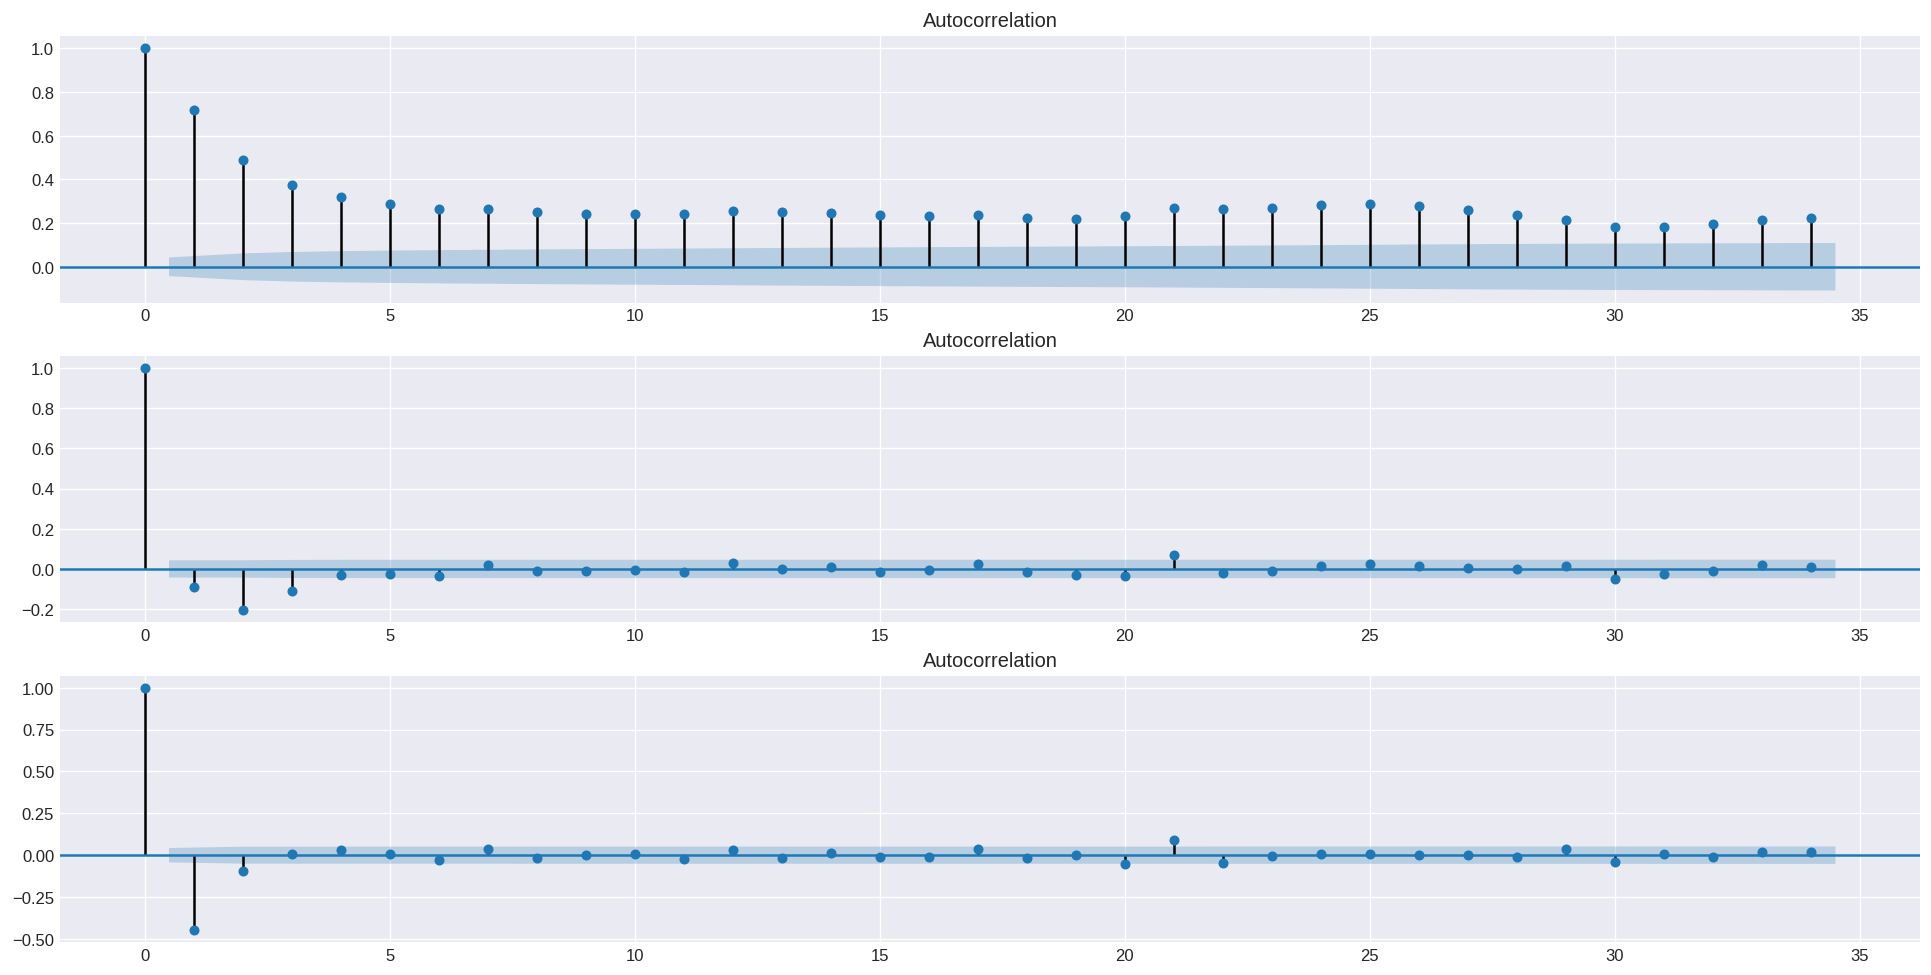

In [ ]:
# Visualize the autocorrelation plots so that we can get a better idea of differencing.
fig,ax = plt.subplots(3,1,figsize=(20,10))
fig = plot_acf(wind_power, ax=ax[0])
fig = plot_acf(wind_power.diff().dropna(), ax=ax[1])
fig = plot_acf(wind_power.diff().diff().dropna(), ax=ax[2])

#Finding order of the AR term

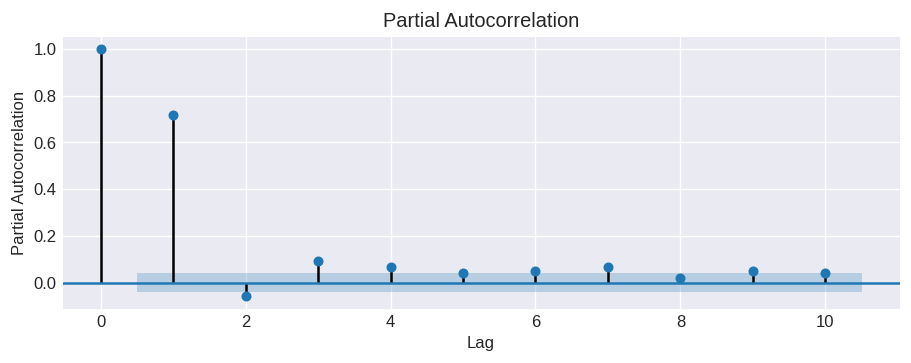

In [ ]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
                    
                    
plot_pacf(wind_power, lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

p=2 looks like a good starting point based on the graph

#train and test split

In [ ]:
wind_power.shape

(2101,)

In [ ]:
test_number = 274
train_w = wind_power[:-test_number]
test_w = wind_power[-test_number:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s = SARIMAX(train_w, order=(3,0,5), seasonal_order=(3,0,5,12),
                enforce_stationarity=False, 
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)


Coefficients: drift       5.921732e-02
ar.L1       1.564250e+00
ar.L2      -6.918907e-01
ar.L3       1.239846e-01
ma.L1      -8.372443e-01
ma.L2      -4.500361e-02
ma.L3      -2.907568e-02
ma.L4       2.140369e-02
ma.L5      -6.022197e-02
ar.S.L12   -4.905163e-01
ar.S.L24    2.037159e-02
ar.S.L36    3.079852e-02
ma.S.L12    5.026202e-01
ma.S.L24    1.087667e-02
ma.S.L36    2.235446e-02
ma.S.L48    1.339155e-02
ma.S.L60    4.306477e-02
sigma2      3.128654e+07
dtype: float64


#LSTM MODEL

In [98]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [99]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24


In [100]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [101]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [102]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [103]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [104]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [105]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [106]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [107]:
df=df.dropna()


In [108]:
df_solar=df[['DE_solar_profile']]

In [ ]:
# for i in range(0,10):
#   df_solar = df_solar[:-1]
# df_solar.tail()

In [109]:
# transform data to be stationary
raw_values = df_solar.values
diff_values = difference(raw_values, 1)

In [110]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [111]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [112]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [113]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

24193/24193 [==============================] - 50s 2ms/step - loss: 0.0013


In [114]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 0s 463ms/step
Hour=1, Predicted=0.004995, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=2, Predicted=0.007162, Expected=0.000000
1/1 [==============================] - 0s 15ms/step
Hour=3, Predicted=0.009599, Expected=0.000000
1/1 [==============================] - 0s 18ms/step
Hour=4, Predicted=0.011622, Expected=0.000000
1/1 [==============================] - 0s 17ms/step
Hour=5, Predicted=0.014629, Expected=0.002200
1/1 [==============================] - 0s 17ms/step
Hour=6, Predicted=0.039002, Expected=0.036700
1/1 [==============================] - 0s 19ms/step
Hour=7, Predicted=0.073178, Expected=0.106000
1/1 [==============================] - 0s 19ms/step
Hour=8, Predicted=0.135478, Expected=0.174400
1/1 [==============================] - 0s 16ms/step
Hour=9, Predicted=0.192379, Expected=0.232100
1/1 [==============================] - 0s 20ms/step
Hour=10, Predicted=0.234624, Expected=0.267900
1/1 [=============

In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


Prediction Plot 

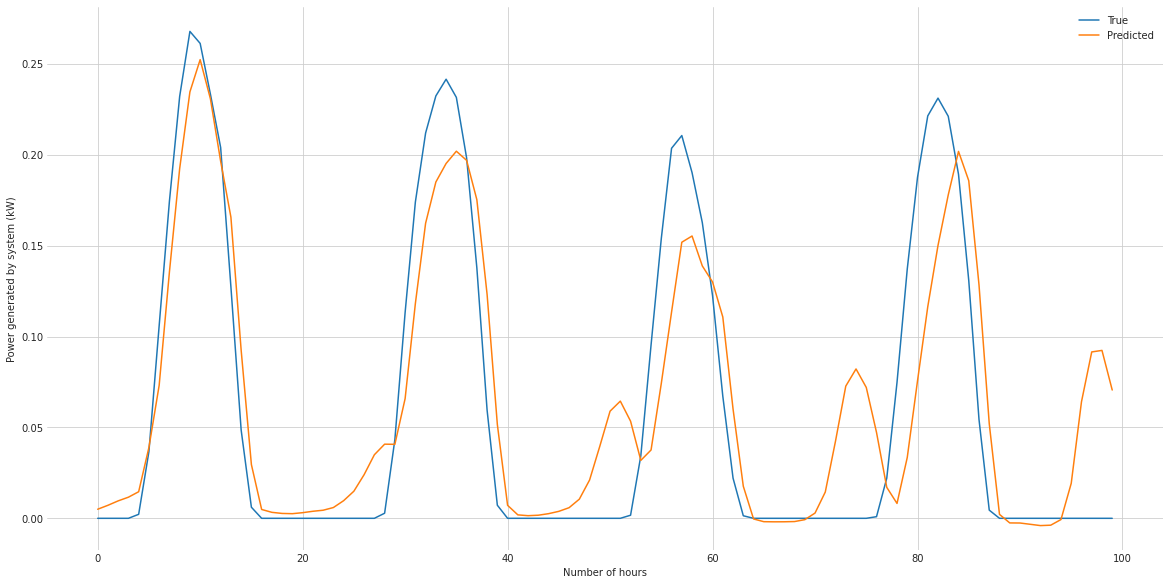

In [115]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()

In [116]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.sum(np.mean(np.abs((expectations - predictions) / expectations)))))
print("Mean squared Error: ", (np.sum(np.mean(np.abs((expectations - predictions)**2 / expectations)))))
residual=abs(expectations-predictions)
ssr=np.sum(residual**2)
mean=np.mean(expectations)
sst=np.sum((expectations-mean)**2)
print("R squared score",(1-(ssr/sst)))


Mean Absolute Percent Error:  11.116542719157465
Mean squared Error:  0.8326534252487484
R squared score 0.6394924895881935


In [ ]:

import numpy as np
import math
import matplotlib as mpl
from matplotlib.image import imread
from random import randint

#import theano
import keras
import pandas

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
import keras.utils
import keras.layers
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import copy
import csv


mpl.use('Agg')
import matplotlib.pyplot as plt

In [ ]:
#Set y values of data to lie between 0 and 1
def normalize_data(dataset, data_min, data_max):
    data_std = (dataset - data_min) / (data_max - data_min)
    test_scaled = data_std * (np.amax(data_std) - np.amin(data_std)) + np.amin(data_std)
    return test_scaled

In [ ]:
def build_model(init_type = 'glorot_uniform', optimizer = 'adam', num_features = 12):
    model = Sequential()
    layers = [num_features, 64, 64, 1, 1]
    model.add(keras.layers.LSTM(
        layers[0],
        input_shape = (None, num_features),
        return_sequences=True))
    model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.LSTM(
        layers[1],
        kernel_initializer = init_type,
        return_sequences=True
        #bias_initializer = 'zeros'
    ))
    model.add(keras.layers.Dropout(0.2))

    model.add(Dense(
        layers[2], activation='tanh',
        kernel_initializer=init_type,
        input_shape = (None, 1)
        ))
    model.add(Dense(
        layers[3]))

    model.add(Activation("relu"))

    #Alternative parameters:
    #momentum = 0.8
    #learning_rate = 0.1
    #epochs = 100
    #decay_rate = learning_rate / 100
    #sgd = keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    #model.compile(loss="binary_crossentropy", optimizer=sgd)
    rms = keras.optimizers.RMSprop(lr=0.002, rho=0.9, epsilon=1e-08, decay=0.01)
    model.compile(loss="mean_squared_error", optimizer=optimizer)

    return model